In [2]:
# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_iris
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Load the Iris dataset
# iris = load_iris()
# data = iris.data
# labels = iris.target
# label_names = iris.target_names

# # Convert to a DataFrame for better visualization
# iris_df = pd.DataFrame(data, columns=iris.feature_names)

# # Perform PCA to reduce dimensionality to 2
# pca = PCA(n_components=2)
# data_reduced = pca.fit_transform(data)

# # Create a DataFrame for the reduced data
# reduced_df = pd.DataFrame(data_reduced, columns=['Principal Component 1', 'Principal Component 2'])
# reduced_df['Label'] = labels

# # Plot the reduced data
# plt.figure(figsize=(8, 6))
# colors = ['r', 'g', 'b']
# for i, label in enumerate(np.unique(labels)):
#     plt.scatter(
#         reduced_df[reduced_df['Label'] == label]['Principal Component 1'],
#         reduced_df[reduced_df['Label'] == label]['Principal Component 2'],
#         label=label_names[label],
#         color=colors[i]
#     )

# plt.title('PCA on Iris Dataset')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.grid()
# plt.show()


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Load the Iris dataset
iris=load_iris()


In [4]:
data=iris.data
data.shape
labels=iris.target
label_names=iris.target_names
label_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_df=pd.DataFrame(data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
pca=PCA(n_components=2)
data_reduced=pca.fit_transform(data)
data_reduced.shape

(150, 2)

In [8]:
reduced_df=pd.DataFrame(data_reduced,columns=['pca1','pca2'])
reduced_df


,pca1,pca2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [9]:
reduced_df['Labels']=labels

In [10]:
reduced_df

,pca1,pca2,Labels
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


In [12]:
label_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
np.unique(labels)

array([0, 1, 2])

In [11]:
plt.figure(figsize=(8, 6))
colors=['r', 'g', 'b']

<Figure size 800x600 with 0 Axes>

In [19]:
reduced_df[reduced_df['Labels']==2]

,pca1,pca2,Labels
100,2.531193,-0.009849,2
101,1.415236,-0.574916,2
102,2.616676,0.343903,2
103,1.971531,-0.179728,2
104,2.350006,-0.040261,2
105,3.397039,0.550837,2
106,0.521232,-1.192759,2
107,2.932587,0.355500,2
108,2.321229,-0.243832,2
109,2.916751,0.782792,2


In [22]:
reduced_df[reduced_df['Labels']==2]['pca1']

100    2.531193
101    1.415236
102    2.616676
103    1.971531
104    2.350006
105    3.397039
106    0.521232
107    2.932587
108    2.321229
109    2.916751
110    1.661774
111    1.803402
112    2.165592
113    1.346164
114    1.585928
115    1.904456
116    1.949689
117    3.487055
118    3.795645
119    1.300792
120    2.427818
121    1.199001
122    3.499920
123    1.388766
124    2.275431
125    2.614090
126    1.258508
127    1.291132
128    2.123609
129    2.388003
130    2.841673
131    3.230674
132    2.159438
133    1.444161
134    1.781295
135    3.076500
136    2.144243
137    1.905098
138    1.169326
139    2.107611
140    2.314155
141    1.922268
142    1.415236
143    2.563013
144    2.418746
145    1.944110
146    1.527167
147    1.764346
148    1.900942
149    1.390189
Name: pca1, dtype: float64

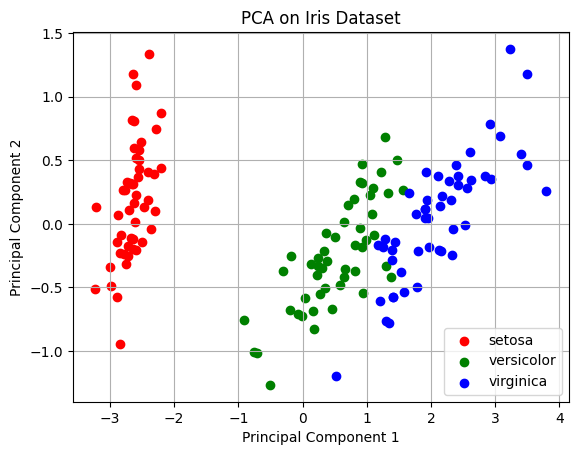

In [23]:
for i ,label in enumerate(np.unique(labels)):
    plt.scatter(
        reduced_df[reduced_df['Labels'] == label]['pca1'],
        reduced_df[reduced_df['Labels'] == label]['pca2'],
        label=label_names[label],
        color=colors[i]
    )
    
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

Imagine you’re taking a picture of a 3D object from the best angle. You want to capture as much detail in a 2D photo as possible.

PCA finds the best angle (PC1 and PC2) so that your 2D view contains most of the shape/information from the full 3D object.

In [24]:
# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.92461872 0.05306648]
Total variance explained: 0.9776852063187963
